In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import os
import re
from matplotlib.ticker import MultipleLocator, FuncFormatter
from scipy.optimize import curve_fit

In [243]:
iv_df = pd.read_csv('Data/IV_Characteristic.csv').dropna(axis=1)

In [56]:
ch1_0v_df = pd.read_csv('Data/Calibration/Channel_1_0V.csv').dropna(axis=1)
ch1_df = pd.read_csv('Data/Calibration/Channel_1.csv').dropna(axis=1)
ch2_df = pd.read_csv('Data/Calibration/Channel_2.csv').dropna(axis=1)
ch3_df = pd.read_csv('Data/Calibration/Channel_3.csv').dropna(axis=1)
ch4_df = pd.read_csv('Data/Calibration/Channel_4.csv').dropna(axis=1)
ch5_df = pd.read_csv('Data/Calibration/Channel_5.csv').dropna(axis=1)
mean_df = (ch2_df+ch1_df+ch3_df+ch4_df+ch5_df)/5

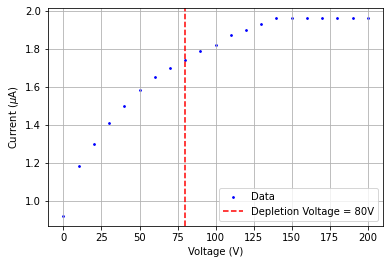

In [244]:

plt.scatter(iv_df['V'],iv_df[' microAmps'],s=3,c='blue',label='Data')
plt.axvline(x=80, color='red', linestyle='--', label='Depletion Voltage = 80V')
plt.xlabel('Voltage (V)')
plt.ylabel('Current ($\mu$A)')
plt.legend(fontsize='medium')
plt.grid()

In [83]:
ch1_df = pd.read_csv('Data/Calibration/Channel_1.txt',sep="\t")
ch1_df['X'].head

<bound method NDFrame.head of 0           0,000000
1        1024,000000
2        2048,000000
3        3072,000000
4        4096,000000
           ...      
250    256000,000000
251    257024,000000
252    258048,000000
253    259072,000000
254    260096,000000
Name: X, Length: 255, dtype: object>

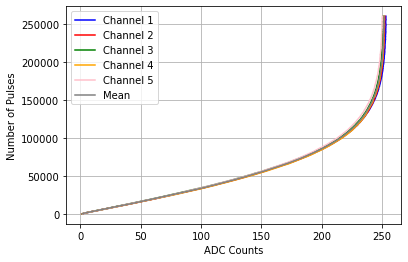

In [86]:
plt.plot(np.array(ch1_df[' Function_0']),np.array(ch1_df['X']),c='blue',label='Channel 1')
plt.plot(np.array(ch2_df[' Function_0']),np.array(ch2_df['X']),c='red',label='Channel 2')
plt.plot(np.array(ch3_df[' Function_0']),np.array(ch3_df['X']),c='green',label='Channel 3')
plt.plot(np.array(ch4_df[' Function_0']),np.array(ch4_df['X']),c='orange',label='Channel 4')
plt.plot(np.array(ch5_df[' Function_0']),np.array(ch5_df['X']),c='pink',label='Channel 5')
plt.plot(np.array(mean_df[' Function_0']),np.array(mean_df['X']),c='grey',label='Mean')

plt.xlabel('ADC Counts')
plt.ylabel('Number of Pulses')
plt.legend(fontsize='medium')
plt.grid()

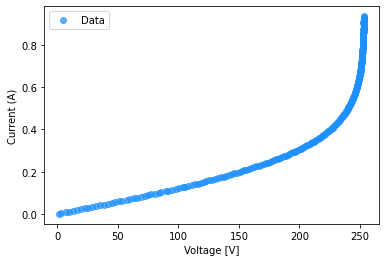

In [12]:
#open csv file
l = 'Data/Calibration/Channel_1.txt'
calib = pd.read_csv(l, sep=' ', header=None)
#remove the first 2 rows
calib = calib.drop([0])

#separate the columns
calib = calib[0].str.split(' ', expand=True)

#separate the column in 2 with \t as separator
calib = calib[0].str.split('\t', expand=True)

#convert the values to float
calib = calib.astype(float)

calib[0] = calib[0] * 3.6
calib[0] = calib[0] * 1e-6

#plot the data
plt.plot(np.array(calib[1]), np.array(calib[0]), 'o',  color='dodgerblue',alpha = 0.7, label='Data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current (A)')
plt.legend()

plt.show()

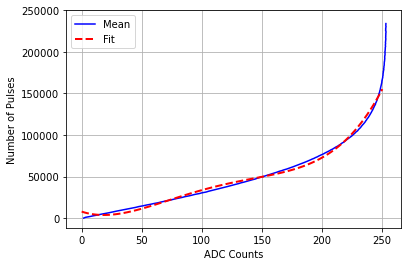

In [29]:
# Define your polynomial function
def f_conv(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

# Define the fit range
fit_range_min = 0
fit_range_max = 250

# Filter the data within the fit range
x_fit = calib[1][(calib[1] >= fit_range_min) & (calib[1] <= fit_range_max)]
y_fit = calib[0][(calib[1] >= fit_range_min) & (calib[1] <= fit_range_max)]



# Fit the filtered data
popt_conv, pcov_conv = curve_fit(f_conv, x_fit, y_fit)


# Plot the data
plt.plot(np.array(calib[1]), np.array(calib[0]),c='blue',label='Mean')

# Plot the fit
x_plot = np.linspace(fit_range_min, fit_range_max, 100)  # Generate x values for the plot
plt.plot(x_plot, f_conv(x_plot, *popt_conv), label='Fit', color='red', linewidth=2, linestyle='--')

fattore_di_scala = 250000
ax = plt.gca()
ticks = np.linspace(0, 1, 6)  # Tick originali da -1 a 1
ax.set_yticks(ticks)
ax.set_yticklabels([f'{int(tick * fattore_di_scala)}' for tick in ticks])

plt.xlabel('ADC Counts')
plt.ylabel('Number of Pulses')
plt.legend(fontsize='medium')
plt.grid()

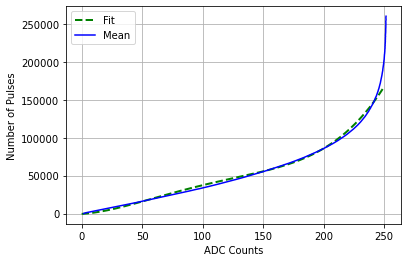

In [28]:
def pol_func (x) :
    return (0.000159*x**4)-(0.059*x**3)+(7.1*x**2)+(100*x)-500
y_fit = pol_func(np.arange(250))

plt.plot(np.arange(250),
         y_fit, color='green',linewidth=2,label='Fit',linestyle='--')
plt.plot(np.array(mean_df[' Function_0']),np.array(mean_df['X']),c='blue',label='Mean')

plt.xlabel('ADC Counts')
plt.ylabel('Number of Pulses')
plt.legend(fontsize='medium')
plt.grid()

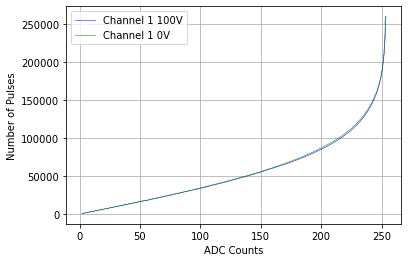

In [57]:
plt.plot(np.array(ch1_df[' Function_0']),np.array(ch1_df['X']),
         c='blue',label='Channel 1 100V',linewidth=0.5)
plt.plot(np.array(ch1_0v_df[' Function_0']),np.array(ch1_0v_df['X']),
         c='green',label='Channel 1 0V',linewidth=0.5)

plt.xlabel('ADC Counts')
plt.ylabel('Number of Pulses')
plt.legend(fontsize='medium')
plt.grid()

In [2]:
pedestal = pd.read_csv('Data/Pedestal/Pedestal.txt',sep=";")
pedestal.iloc[0]

511.000000        514.0
511.000000.1      513.0
520.000000        514.0
517.000000        516.0
525.000000        518.0
                  ...  
511.000000.46     516.0
520.000000.103    513.0
511.000000.47     510.0
519.000000.81     514.0
517.000000.83     512.0
Name: 0, Length: 1000, dtype: float64

In [3]:
means = np.zeros(127)
for i in range(len(pedestal)) :
    means[i] = np.average(pedestal.iloc[i])
means

array([513.844, 513.137, 518.12 , 512.439, 513.343, 513.588, 513.823,
       514.049, 512.594, 512.222, 514.681, 514.177, 513.933, 514.295,
       513.489, 513.388, 513.086, 513.672, 513.383, 515.393, 512.282,
       513.913, 512.116, 513.581, 513.07 , 510.645, 511.402, 512.004,
       512.226, 511.444, 510.953, 512.63 , 512.022, 513.146, 511.406,
       512.386, 513.601, 512.247, 510.735, 512.331, 515.192, 512.109,
       510.076, 508.959, 510.437, 511.046, 511.393, 509.967, 511.987,
       516.424, 511.503, 512.11 , 512.467, 511.516, 509.497, 510.483,
       510.303, 510.727, 513.386, 510.403, 510.612, 511.389, 510.42 ,
       508.344, 507.564, 508.534, 508.907, 511.275, 508.365, 509.508,
       509.256, 508.276, 509.366, 508.047, 509.413, 510.07 , 511.013,
       508.949, 508.848, 509.08 , 508.343, 507.698, 508.518, 508.173,
       509.574, 509.4  , 509.892, 512.364, 508.509, 507.32 , 509.497,
       511.931, 511.182, 509.841, 507.497, 509.804, 510.22 , 511.397,
       510.906, 509.

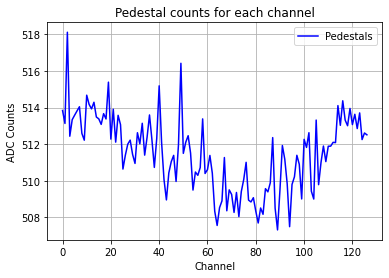

In [5]:
plt.plot(means,c='blue',label='Pedestals')

plt.title('Pedestal counts for each channel')
plt.ylabel('ADC Counts')
plt.xlabel('Channel')
plt.legend(fontsize='medium')
plt.grid()

In [6]:
#noise = pedestal.iloc[1] - means[1]
noise = np.zeros(1000)
for i in range(len(pedestal.iloc[0])) :
    for j in range(len(pedestal)) :
        noise[i] = np.average(pedestal.iloc[j,i]-means[j])

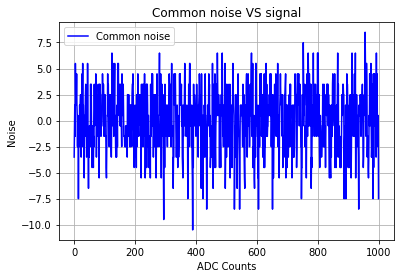

In [9]:
plt.plot(np.arange(1000),np.array(noise),c='blue',label='Common noise')

plt.title('Common noise VS signal')
plt.xlabel('ADC Counts')
plt.ylabel('Noise')
plt.legend(fontsize='medium')
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


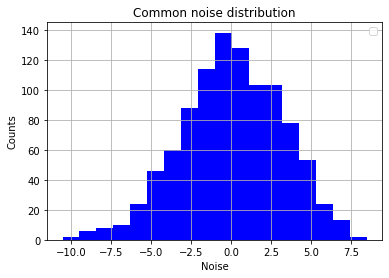

In [7]:
plt.hist(noise,bins=18,color='blue')

plt.title('Common noise distribution')
plt.ylabel('Counts')
plt.xlabel('Noise')
plt.legend(fontsize='medium')
plt.grid()

In [11]:
noise_vs_sig = np.zeros(127)
#for i in range(len(pedestal)) :
#    noise_vs_sig[i] = np.sqrt(np.average((pedestal.iloc[i]-means[i]-noise[i])**2))

for i in range(len(pedestal.iloc[0])) :
    for j in range(len(pedestal)) :
        noise_vs_sig[j] = np.sqrt((np.sum((pedestal.iloc[j]-means[j]-noise[i])**2))
                                  /(len(pedestal.iloc[0])-1))

noise_vs_sig.shape

(127,)

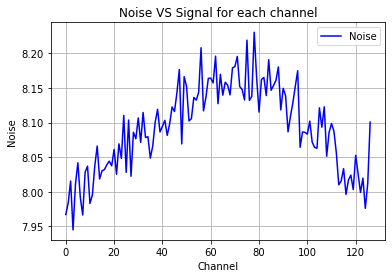

In [12]:
plt.plot(noise_vs_sig,c='blue',label='Noise')

plt.title('Noise VS Signal for each channel')
plt.xlabel('Channel')
plt.ylabel('Noise')
plt.legend(fontsize='medium')
plt.grid()

In [33]:
laser_sync = pd.read_csv('Data/Laser/LaserSync.csv').dropna(axis=1)

In [34]:
laser_sync[' Function_0'] = laser_sync[' Function_0'] +12

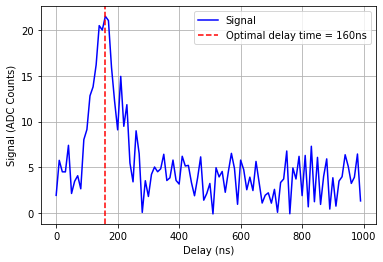

In [40]:
plt.plot(np.linspace(0,990,100),np.array(laser_sync[' Function_0']),c='blue',label='Signal')

plt.xlabel('Delay (ns)')
plt.ylabel('Signal (ADC Counts)')
plt.axvline(x=160, color='red', linestyle='--', label='Optimal delay time = 160ns')
plt.legend(fontsize='medium',loc='best')
plt.grid()

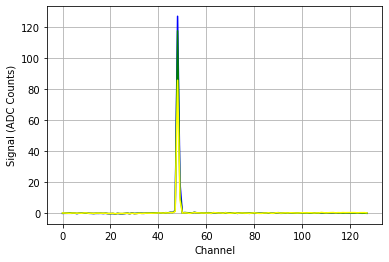

In [42]:
laser_scan = pd.read_csv('Data/Laser/Laserscan.txt',sep='\t')

plt.plot(np.array(laser_scan.iloc[2]),c='blue',label='Position 1')
plt.plot(np.array(laser_scan.iloc[3]),c='green',label='Position 2')
plt.plot(np.array(laser_scan.iloc[4]),c='yellow',label='Position 3')

plt.xlabel('Channel')
plt.ylabel('Signal (ADC Counts)')
#plt.legend(fontsize='medium')
plt.grid()

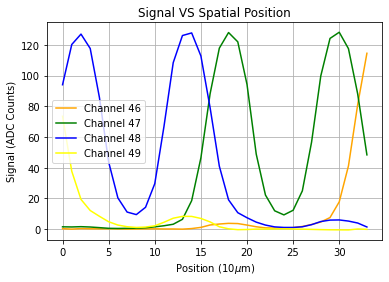

In [41]:
channel46 = np.zeros(34) 
channel47 = np.zeros(34) 
channel48 = np.zeros(34) 
channel49 = np.zeros(34) 

for i in range(len(laser_scan)) :
    channel46[i] = laser_scan.iloc[i,46]
    channel47[i] = laser_scan.iloc[i,47]
    channel48[i] = laser_scan.iloc[i,48]
    channel49[i] = laser_scan.iloc[i,49]

plt.plot(channel46,c='orange',label='Channel 46')
plt.plot(channel47,c='green',label='Channel 47')
plt.plot(channel48,c='blue',label='Channel 48')
plt.plot(channel49,c='yellow',label='Channel 49')

plt.title('Signal VS Spatial Position')
plt.xlabel('Position (10$\mu$m)')
plt.ylabel('Signal (ADC Counts)')
plt.legend(fontsize='medium')
plt.grid()


['0CCEL.txt', '100CCEL.txt', '10CCEL.txt', '110CCEL.txt', '120CCEL.txt', '130CCEL.txt', '140CCEL.txt', '150CCEL.txt', '160CCEL.txt', '170CCEL.txt', '180CCEL.txt', '190CCEL.txt', '200CCEL.txt', '20CCEL.txt', '30CCEL.txt', '40CCEL.txt', '50CCEL.txt', '60CCEL.txt', '70CCEL.txt', '80CCEL.txt', '90CCEL.txt']
[0, 100, 10, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 20, 30, 40, 50, 60, 70, 80, 90]
(21, 127)


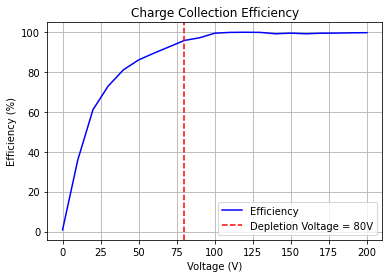

In [39]:
# Get the list of files in the folder
files = os.listdir('Data/CCEL')

#odrer the files by name in ascending order since there is a number in the name
files.sort()

print(files)

#remove .DS_Store
#files.remove('.DS_Store')

#save the number that is in the name of the files
voltage = [int(f.split('CCEL.txt')[0]) for f in files]
print(voltage)


# Create an empty list to store the data
data = []

# Loop over the files
for file in files:
    # Read the data
    df = pd.read_csv('Data/CCEL/' + file, sep=';', header=None)
    # Remove the first row
    df = df.drop([0])
    # Store the data in the list
    data.append(df)

# Convert the list to a numpy array
data = np.array(data)

#reshape the data
data = data.reshape(data.shape[0], data.shape[1])

# order the data by the first column

#convert the data to float
data = data.astype(float)

# Print the shape of the data
print(data.shape)


# summ al the values for each column
sums = np.sum(data, axis=1)

max_sum = sums.max()

#divide the sum by the maximum sum
norm = (sums / max_sum)*100 

#order the data by the voltage
voltage, norm = zip(*sorted(zip(voltage, norm)))

#plot the data
plt.plot(voltage, norm, color='blue', label='Efficiency')
plt.axvline(x=80, color='red', linestyle='--', label='Depletion Voltage = 80V')
plt.title('Charge Collection Efficiency')
plt.xlabel('Voltage (V)')
plt.ylabel('Efficiency (%)')
plt.legend(fontsize='medium',loc='best')
plt.grid()

Fit parameters and their errors:
a = 299.99999999999994 +/- 59.38277074936641


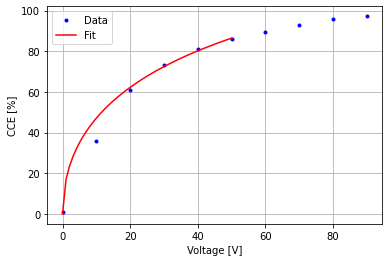

In [40]:
#now fit the data of the CCEL
def f(x, a):
    D = 300
    U_dep = 80
    return 100*(1 - np.exp(-(D * np.sqrt(x/U_dep))/a)) / (1 - np.exp(-D/a))


#set the range of the parameter a allowed for the fit
a_min = 1
a_max = 300

# Filter the data within the fit range
voltage = np.array(voltage)
norm = np.array(norm)

# fit the voltage_q and norm_q
popt, pcov = curve_fit(f, voltage[:9], norm[:9], bounds=(a_min, a_max))

# Plot the data
plt.plot(voltage[:10], norm[:10], 'o', label='Data',color='blue',markersize=3)

# Plot the fit
x_plot = np.linspace(0, 50, 50)  # Generate x values for the plot
plt.plot(x_plot, f(x_plot, *popt), label='Fit', color='red')

plt.grid()
plt.xlabel('Voltage [V]')
plt.ylabel('CCE [%]')
plt.legend()

# print the fit parameters
print('Fit parameters and their errors:')
print('a =', popt[0], '+/-', np.sqrt(pcov[0, 0]))

['70_Cluster_adc_entries.txt', '140_Cluster_adc_entries.txt', '200_Cluster_adc_entries.txt', '120_Cluster_adc_entries.txt', '190_Cluster_adc_entries.txt', '160_Cluster_adc_entries.txt', '90_Cluster_adc_entries.txt', '180_Cluster_adc_entries.txt', '150_Cluster_adc_entries.txt', '170_Cluster_adc_entries.txt', '110_Cluster_adc_entries.txt', '50_Cluster_adc_entries.txt', '40_Cluster_adc_entries.txt', '130_Cluster_adc_entries.txt', '10_Cluster_adc_entries.txt', '30_Cluster_adc_entries.txt', '20_Cluster_adc_entries.txt', '0_Cluster_adc_entries.txt', '80_Cluster_adc_entries.txt', '100_Cluster_adc_entries.txt', '60_Cluster_adc_entries.txt']
[70, 140, 200, 120, 190, 160, 90, 180, 150, 170, 110, 50, 40, 130, 10, 30, 20, 0, 80, 100, 60]
[860613.2086967814, 998633.3590384468, 1020827.1660024755, 985985.4607864179, 1016000.8110209296, 1020762.0952578919, 950654.0128715776, 1008723.0368262487, 1009258.8875578517, 1018728.0387826822, 989358.8130916635, 617986.3665361631, 522223.17403676576, 993288.55

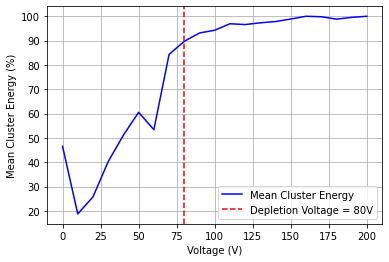

In [61]:
# Get the list of files in the folder
files = os.listdir('Data/source_measurement/CCEQ')

# Take only the .txt files
files = [f for f in files if '.txt' in f]
print(files)

# Save the number that is in the name of the files
voltage_q = [int(f.split('_Cluster_adc_entries.txt')[0]) for f in files]
print(voltage_q)

# Create an empty list to store the data
data = []

# Loop over the files
for file in files:
    with open("Data/source_measurement/CCEQ/" + file , "r") as file:
        # Read the content of the file
        content = file.read()

    # Split the content by whitespace to get individual values
    values_str = content.split()

    # Convert each value to a float
    values = [float(val) for val in values_str]

    # Print the array of values
    data.append(values)

# Convert the list to a numpy array
data = np.array(data,dtype=object)

data[20] = data[20][:10000]

# summ al the values for each element
sums  = []
for i in range(len(data)):
    sums.append(sum(data[i]))

print(sums)

max_sum = max(sums)

sums = np.array(sums)

# #divide the sum by the maximum sum
norm_q = 100* sums / max_sum

# #order the data by the voltage_q
voltage_q, norm_q = zip(*sorted(zip(voltage_q, norm_q)))

#plot the data
plt.plot(voltage_q, norm_q, color='blue', label='Mean Cluster Energy')
plt.axvline(x=80, color='red', linestyle='--', label='Depletion Voltage = 80V')
plt.xlabel('Voltage (V)')
plt.ylabel('Mean Cluster Energy (%)')
plt.legend(fontsize='medium',loc='best')
plt.grid()

(128,)


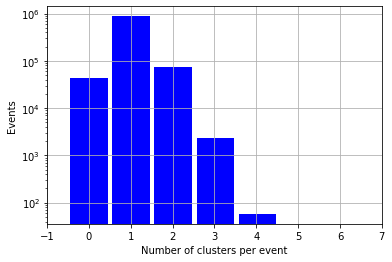

In [68]:
num_clu = pd.read_csv('Data/source_measurement/number_of_clusters.txt', header=None)
#remove the first row
num_clu = num_clu.drop([0])

#convert the values to float
num_clu = num_clu.astype(float)
num_clu = num_clu.values
num_clu = num_clu.reshape(num_clu.shape[0])
print(num_clu.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.bar(np.linspace(0,num_clu.shape[0],num_clu.shape[0]), num_clu, width=0.9, color='blue', label='Data')
plt.xlim(-1, 7)
plt.yscale('log')
plt.xlabel('Number of clusters per event')
plt.ylabel('Events')
plt.grid()


(128,)


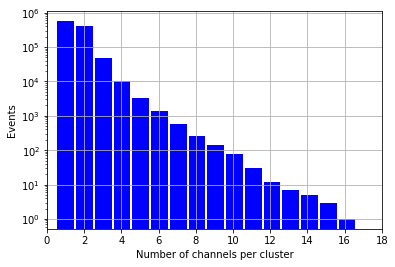

In [71]:
clus_size = pd.read_csv('Data/source_measurement/cluster_size.txt', header=None)
#remove the first row
clus_size = clus_size.drop([0])

#convert the values to float
clus_size = clus_size.astype(float)
clus_size = clus_size.values
clus_size = clus_size.reshape(clus_size.shape[0])
print(clus_size.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.bar(np.linspace(0,clus_size.shape[0],clus_size.shape[0]), clus_size, width=0.9, color='blue', label='Data')
#set log scale

plt.yscale('log')
plt.xlim(0, 18)
plt.xlabel('Number of channels per cluster')
plt.ylabel('Events')
plt.grid()


(128,)


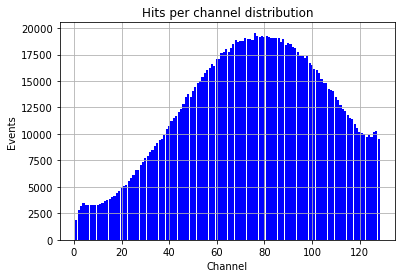

In [107]:
hitma = pd.read_csv('Data/source_measurement/hitmap.txt', header=None)
#remove the first row
hitma = hitma.drop([0])

#convert the values to float
hitma = hitma.astype(float)
hitma = hitma.values
hitma = hitma.reshape(hitma.shape[0])
print(hitma.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.bar(np.linspace(1,hitma.shape[0],hitma.shape[0]), hitma, width=0.9, color='blue', label='Data')
plt.title('Hits per channel distribution')
plt.ylabel('Events')
plt.xlabel('Channel')
plt.grid()

(1032986,)


(0.0, 500.0)

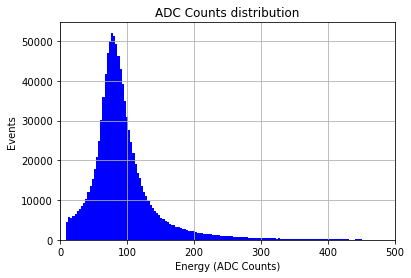

In [45]:
# Read the file line by line
with open('Data/source_measurement/Cluster_adc_entries.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty list to store NumPy arrays
arrays = []

# Process each line
for line in lines:
    # Split the line by commas
    values = line.strip().split('\t')
    
    # Convert values to floats
    floats = [float(value) for value in values]
    
    # Convert the list of floats to a NumPy array
    array = np.array(floats)
    
    # Append the NumPy array to the list
    arrays.append(array)

# Convert the list of NumPy arrays to a single NumPy array
result_array = np.array(arrays,dtype=object)

# Print the resulting NumPy array
print(result_array.shape)

#sum all the values for each row
for i in range(result_array.shape[0]):
    result_array[i] = np.sum(result_array[i])

#plot the data as histogram, the position is the bin and the value is the frequency
aaaa = plt.hist(result_array, bins=300, color='blue', label='Data')
plt.title('ADC Counts distribution')
plt.ylabel('Events')
plt.xlabel('Energy (ADC Counts)')
plt.grid()

plt.xlim(0, 500)


In [51]:
#cpnvert adc to energy using f_conv
energy = f_conv(result_array, *popt_conv)*1000
energy.shape

(1032986,)

114.00325438007681


(0.0, 400.0)

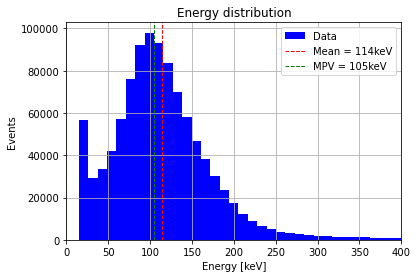

In [55]:
#energy = f_conv(result_array, *popt_conv)*1000
#energy= energy[energy<=500]

#plot the data as histogram, the position is the bin and the value is the frequency
aaaa = plt.hist(energy, bins=50000, color='blue', label='Data')
plt.title('Energy distribution')
plt.ylabel('Events')
plt.xlabel('Energy [keV]')
plt.grid()

#plot line for most common energy
plt.axvline(energy[energy<=500].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean = 114keV')
plt.axvline(105, color='g', linestyle='dashed', linewidth=1, label='MPV = 105keV')
print(energy[energy<=500].mean())
plt.legend()


plt.xlim(0, 400)

In [54]:
energy[energy<=500].std()

62.23424716411093